In [1]:
#Call of all the libreries needed in the computation. 
from numpy import *
import math
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter
from OTOCfuncShift import * 
# ! OTOCfuncSgift is the same of OTOCfunc but when performing the FFT here we use the shift of the Ft and IFT

In [2]:
#Parameters to compute the spreading of the wave-packet.
# N is the number for the space/momentum discretization
# T is the period of the kicks which is proportional to heff 
# K is the value of the kicking strength
# Nkicks is the number of kicks.
N=2**10
T=2**(-4)
K=5
Nkicks=4

In [3]:
# Check the correct type of each parameter and its sign if needed.
# N
if (issubclass(type(N),int)):
    ()
else:
    print("Wrong type!")
    print("N is", type(N), ", it must be int!")
    sys.exit()
if (N<0):
    print("N must be greater than 0!")
    sys.exit()

# T
if (issubclass(type(T),int) or issubclass(type(T),float)):
    ()
else:
    print("Wrong type!")
    print("T is", type(T), ", it must be float or int!")
    sys.exit()
if (T<0):
    print("T must be greater than 0!")
    sys.exit()

# K
if (issubclass(type(K),int) or issubclass(type(K),float)):
    ()
else:
    print("Wrong type!")
    print("K is", type(K), ", it must be float or int!")
if (K<0):
    print("K must be greater than 0!")
    sys.exit()

# Nkicks
if (issubclass(type(Nkicks),int)):
    ()
else:
    print("Wrong type!")
    print("Nkicks is", type(Nkicks), ", it must be int!")
    sys.exit()
if (Nkicks<0):
    print("Nkicks must be greater than 0!")
    sys.exit()

# NT relation check
if(2*N*T<2**7 or 2*N*T>2**16):
    print("N*T out of range! Using T=2**-7 and N=2**16 instead.")
    N=2**14
    T=2**-7

In [4]:
xmax=2*pi
dx=xmax/N # step size for the position space
xvec=arange(0,xmax,dx) #0=2pi
dp=zeros([N])
for i in range(0,N):
    dp[i]=i-(N/2)

# set initial conditions
p_t=zeros([N,Nkicks], dtype = 'complex_')
x_t=zeros([N,Nkicks], dtype = 'complex_')

sigma=4 # as in the paper, it is fixed
# Compute different inital state: a gaussian centered on p0=0
p_t[:,0]=(1/sqrt(2*pi*sigma**2))*exp(-((dp)**2)/(2*sigma**2)) # gaussian as in the paper
p_t[:,0]=p_t[:,0]/(sqrt(sum(abs(p_t[:,0])**2)))
# Initial states in the position representation 
x_t[:,0]=fft.ifftshift(sqrt(N)*fft.ifft(fft.ifftshift(p_t[:,0])))
x_t[:,0]=x_t[:,0]/sqrt((sum(abs(x_t[:,0])**2)*dx))

for tt in range(1,Nkicks):
    p_t[:,tt]=Ut(p_t[:,0],2,tt,dp,N,K,T)
    x_t[:,tt]=fft.ifftshift(sqrt(N)*fft.ifft(fft.ifftshift(p_t[:,tt])))
    x_t[:,tt]=x_t[:,tt]/sqrt(sum(abs(x_t[:,tt])**2)*dx)
    
   
    
    

In [5]:
# Normalization check
tol=10**(-4)
for tt in range(Nkicks):
    if (abs(sum(abs(x_t[:,tt])**2)*dx)-1.0>tol):
        print("Normalization error in psi(x) for Kick=", tt)
        sys.exit()
    if (abs(sum(abs(p_t[:,tt])**2))-1.0>tol):
        print("Normalization error in psi(p) for Kick=", tt)
        sys.exit()

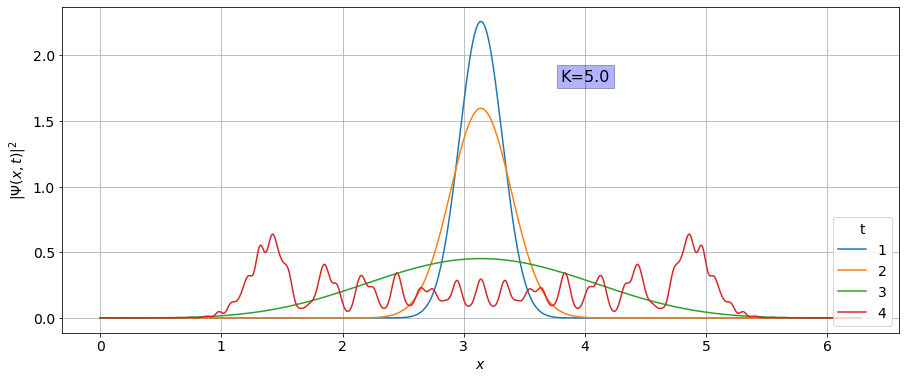

In [7]:
plt.figure(figsize=(15, 6))
#  Set X=True to compute the position plot, set X=False for the momentum one.
X=True 

if(X==True):
    for tt in range(0,Nkicks):
        plt.plot(xvec,abs(x_t[:,tt])**2)
        
    plt.legend(arange(1,Nkicks+1,1), loc='lower right',title='t', fontsize='14',title_fontsize=14)
    plt.xlabel('$x$', size=14)
    plt.ylabel('$\|\Psi(x,t)\|^2$', size=14)
    plt.xticks(size=14)
    plt.yticks(size=14)
    plt.text(3.8,1.8,"K=%.1f"%K, size=16,bbox=dict(facecolor='blue', alpha=0.3))
    plt.grid()
    plt.savefig('ScrumblingX%.1f.png'%K, dpi=100)

else:
    for tt in range(0,Nkicks):
        plt.plot(dp,abs(p_t[:,tt])**2)
        
    plt.legend(arange(1,Nkicks+1,1), loc='lower right',title='t', fontsize='14',title_fontsize=14)
    plt.xlim([-75,75])
    plt.xlabel('$p$', size=14)
    plt.ylabel(R'$\| \tilde{\Psi}(p,t)\|^2$', size=14)
    plt.text(15,0.12,"K=%.1f"%K, size=16,bbox=dict(facecolor='blue', alpha=0.3))
    plt.xticks(size=14)
    plt.yticks(size=14)
    plt.grid()
    plt.savefig('ScrumblingP%.1f.png'%K, dpi=100)
